In [ ]:
# pip install pillow
# pip install numpy
# pip install matplotlib
# pip install tensorflow

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
# 字典储存图像信息
# dict_label = {0:'不准停车', 1: '所有车辆不准进入', 2:'不准掉头', 3:'靠左行驶', 4:'直行', 5:'主要通道'}
dict_label = {0:'不准停车', 1:'不准掉头', 2:'直行', 3:'主要通道'}

file_list_all = []
label = []

for i in dict_label:
    filedir = '..\Dataset\\'+ dict_label[i] + '\edit'
    os.listdir(filedir)

    file_list = []
    for root, dirs, files in os.walk(filedir):
        for file in files:
            if os.path.splitext(file)[1] == '.png':
                file_list.append(os.path.join(root, file))

    # 加总列表
    file_list_all += file_list

    # 列表输入标签
    label += [i]*len(file_list)

In [3]:
# 图片数据转化数组
M = []
for filename in file_list_all:
    im = Image.open(filename)
    width, height = im.size
    im_L = im.convert("L")
    Core = im_L.getdata()
    arr1 = np.array(Core, dtype='float32') / 255.0
    arr1.shape
    list_img = arr1.tolist()
    M.extend(list_img)

X = np.array(M).reshape(len(file_list_all), width, height)
X.shape

# 列表输入标签
y = np.array(label)

In [4]:
# 按照4：1 的比例将数据划分训练和测试
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=0)

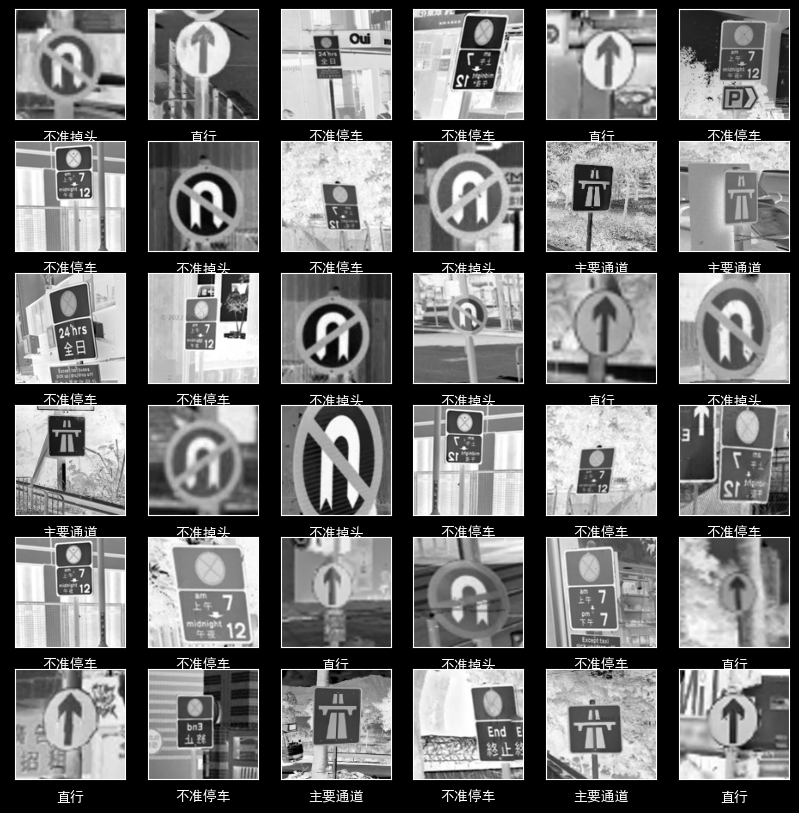

In [5]:
# 查看标签是否正确
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(dict_label[train_labels[i]])

In [14]:
# 开始训练
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128,128)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(len(dict_label), activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_lost, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)


Epoch 1/5
6/6 [==============================] - 0s 5ms/step - loss: 6.7643 - accuracy: 0.3012
Epoch 2/5
6/6 [==============================] - 0s 6ms/step - loss: 2.2378 - accuracy: 0.4277
Epoch 3/5
6/6 [==============================] - 0s 5ms/step - loss: 1.8802 - accuracy: 0.5060
Epoch 4/5
6/6 [==============================] - 0s 5ms/step - loss: 1.0791 - accuracy: 0.5241
Epoch 5/5
2/2 [==============================] - 0s 2ms/step - loss: 1.1650 - accuracy: 0.5952
Test accuracy:  0.5952380895614624


In [15]:
# 预测图像
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
dict_label[np.argmax(predictions[0])]

2/2 [==============================] - 0s 2ms/step


'不准停车'

In [16]:
# 定义画图函数
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = '#00bc57'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(dict_label[predicted_label], 100*np.max(predictions_array),dict_label[true_label]), color=color)

# 
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(len(dict_label)), predictions_array, color="#ff7f0e", width=0.2)
    
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('#00bc57')


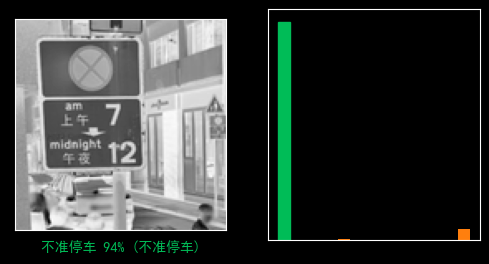

In [17]:
# 看一张预测
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

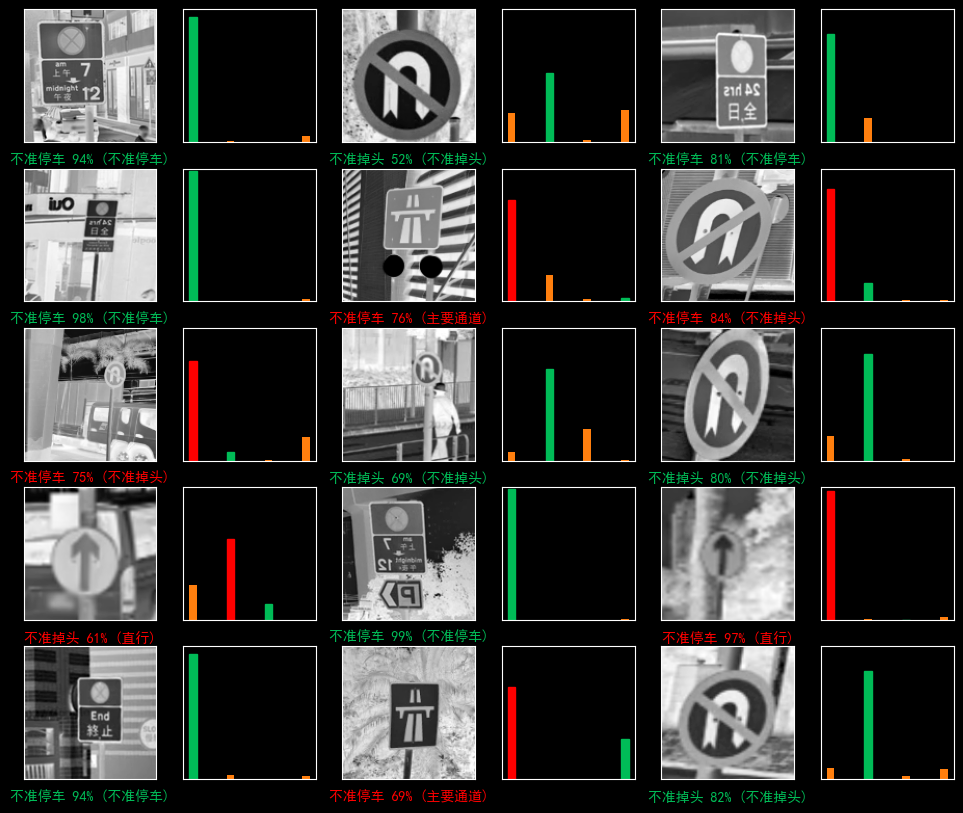

In [18]:
# 看多张预测
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2* num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [19]:
# 外部图像识别

# 从外部获取未知图像
filedir = '../test/source'
file_list_pred = []
for root, dirs, files in os.walk(filedir):
    for file in files:
         if os.path.splitext(file)[1] == '.png':
            file_list_pred.append(os.path.join(root, file))


# 修改图片像素
for filename in file_list_pred:
    try:
        im = Image.open(filename)
        new_im = im.resize((128,128))

        new_filename = filename.split("\\")
        new_im.save('../test/resize/' + new_filename[-1])

    except OSError as e:
        print(e.args)


# 获取未知图片列表
filedir = '../test/resize/'
file_list_pred = []
for root, dirs, files in os.walk(filedir):
    for file in files:
         if os.path.splitext(file)[1] == '.png':
            file_list_pred.append(os.path.join(root, file))

In [20]:
import random

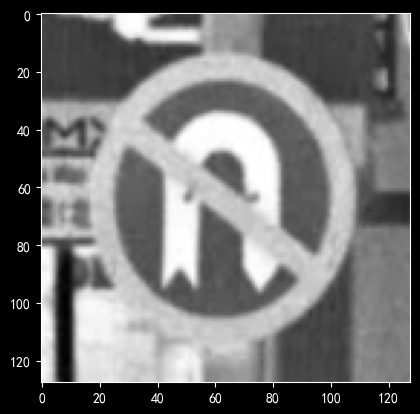

1/1 [==============================] - 0s 18ms/step
[[0.12361445 0.8302718  0.0361659  0.00994788]]


'不准掉头'

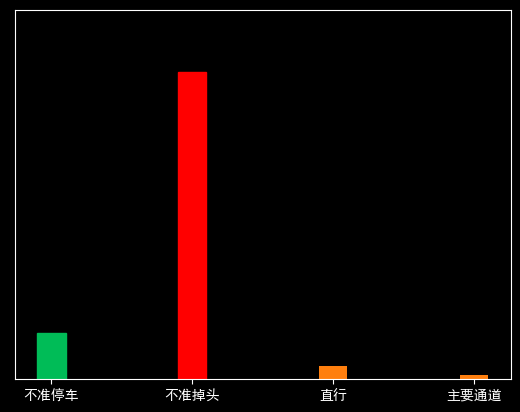

In [21]:
getPic = random.randint(0, len(file_list_pred))
im = Image.open(file_list_pred[getPic])
width, height = im.size

im_L = im.convert("L")
Core = im_L.getdata()

arr1 = np.array(Core, dtype='float32')/255.0
arr1.shape

list_img = arr1.tolist()

pred_images = np.array(list_img).reshape(width, height)
pred_labels = np.array([0])
img = pred_images

plt.imshow(img, cmap=plt.cm.binary)
plt.show()

img = (np.expand_dims(img, 0))

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, pred_labels)
_ = plt.xticks(range(len(dict_label)), dict_label.values())

np.argmax(predictions_single[0])
dict_label[np.argmax(predictions_single[0])]
